In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msn
plt.style.use('ggplot')

In [3]:
dataset = pd.read_csv(r'C:\Users\Admin\Desktop\csv files\train_and_test2.csv')
dataset.head(2)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [5]:
df = dataset.copy()

In [6]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [7]:
df = df.drop(['zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6',
        'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14',  'zero.15', 'zero.16', 'zero.17',
       'zero.18'  ], axis = 1)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [8]:
df = df.rename(columns = {'2urvived' : 'Survived'})

In [9]:
df.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [10]:
df = df.loc[~df['Embarked'].isna()].reset_index(drop = True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1307 non-null   int64  
 1   Age          1307 non-null   float64
 2   Fare         1307 non-null   float64
 3   Sex          1307 non-null   int64  
 4   sibsp        1307 non-null   int64  
 5   Parch        1307 non-null   int64  
 6   Pclass       1307 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   Survived     1307 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.0 KB


In [12]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,655.319816,29.471821,33.209595,0.355011,0.499617,0.385616,2.296863,1.492731,0.260138
std,377.922205,12.881592,51.748768,0.478700,1.042273,0.866092,0.836942,0.814626,0.438877
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.500000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.500000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


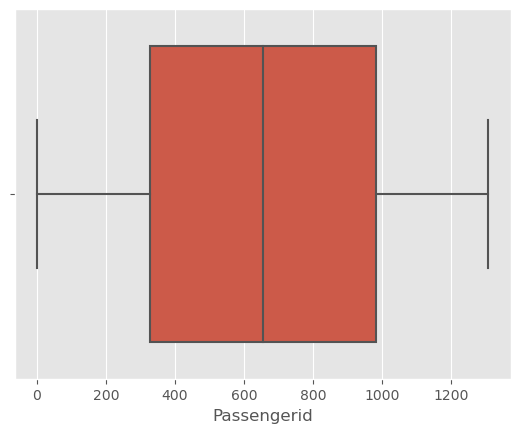

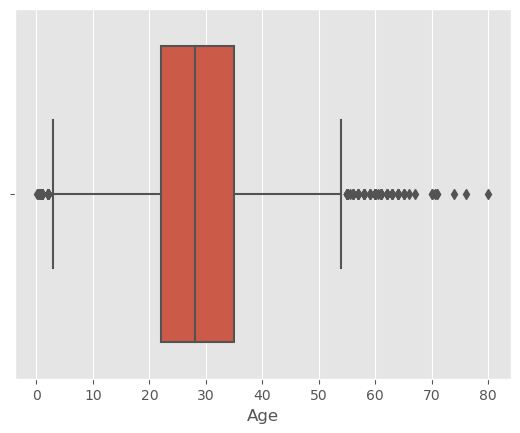

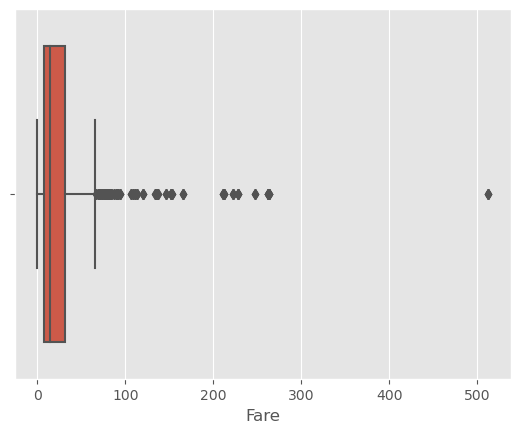

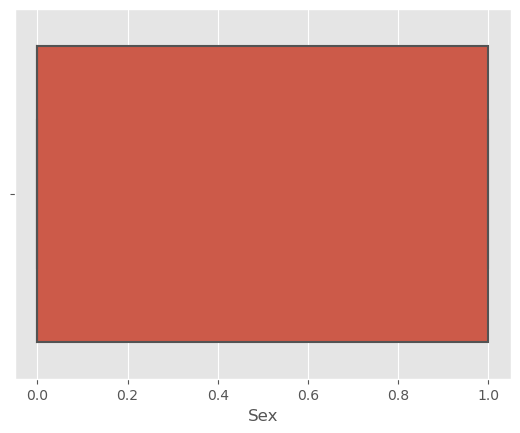

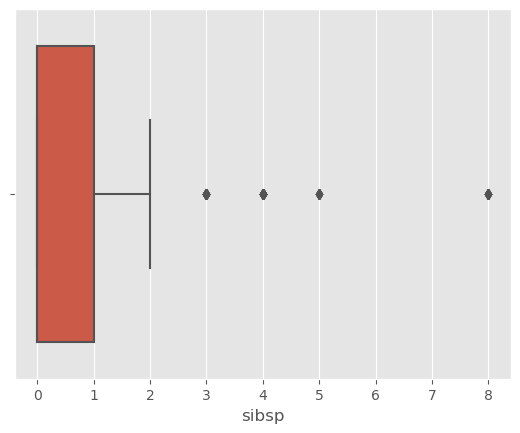

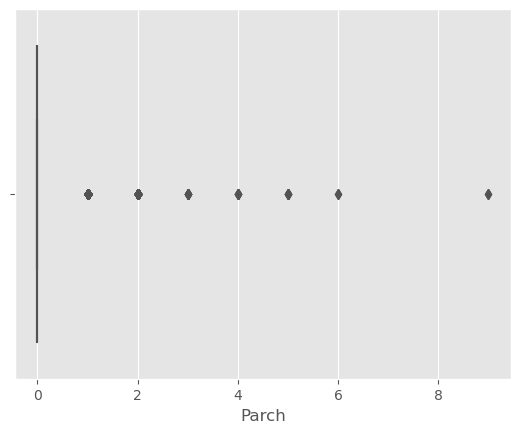

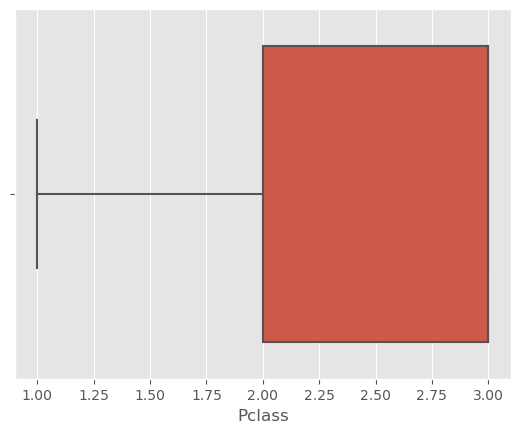

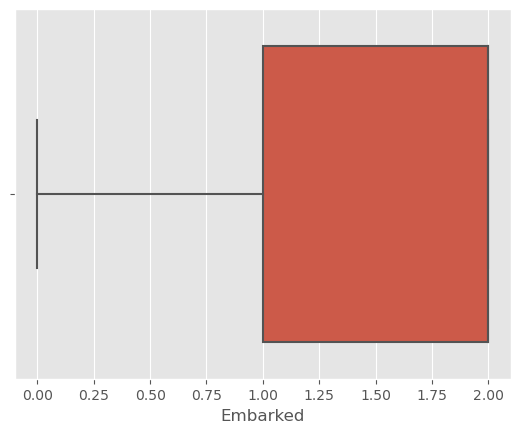

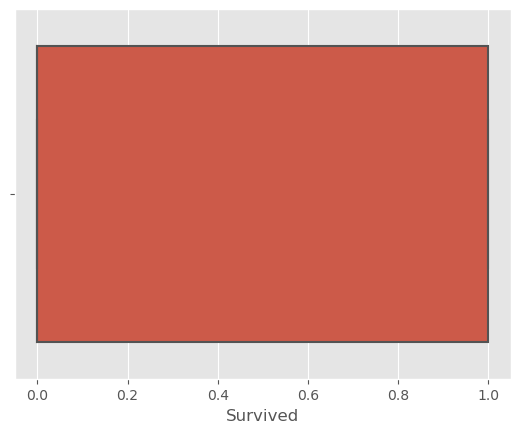

In [13]:
for i in df.select_dtypes(include = 'number').columns:
    sns.boxplot(data = df, x = i)
    plt.show()

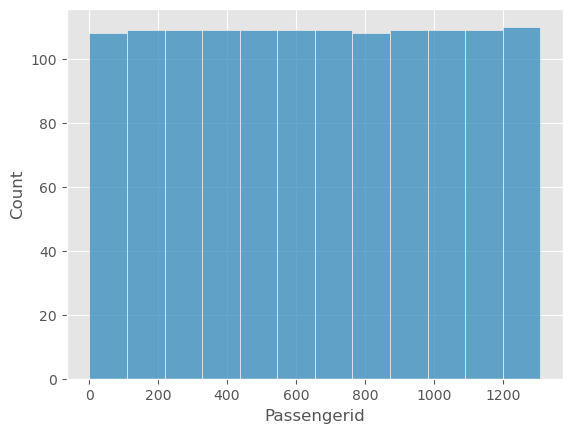

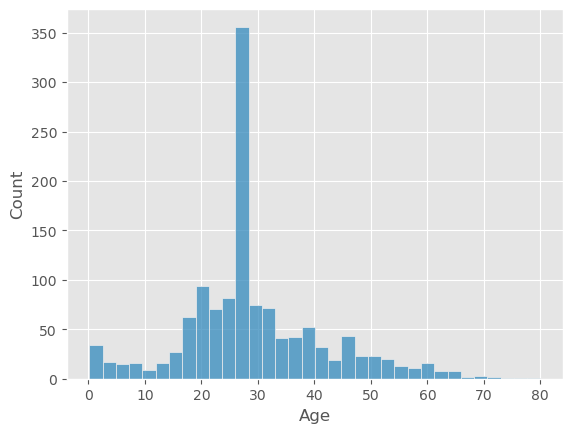

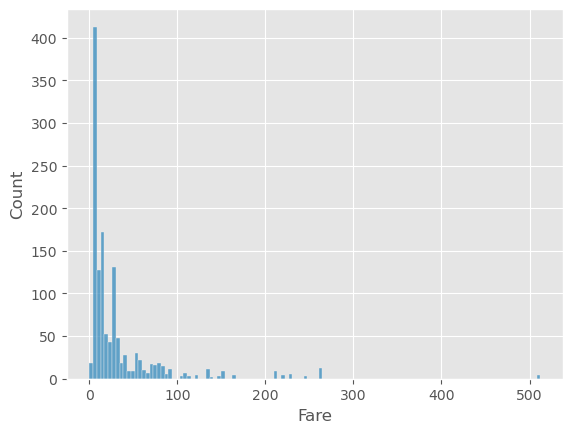

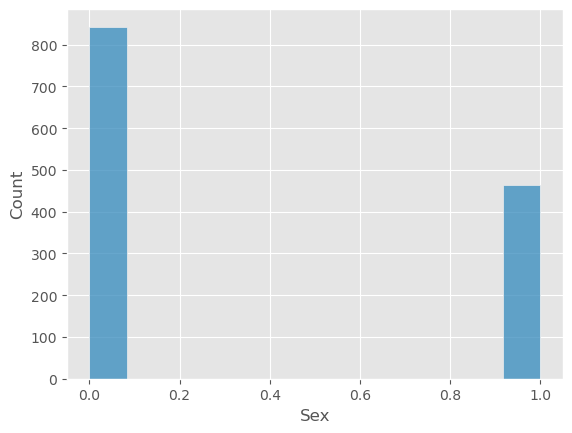

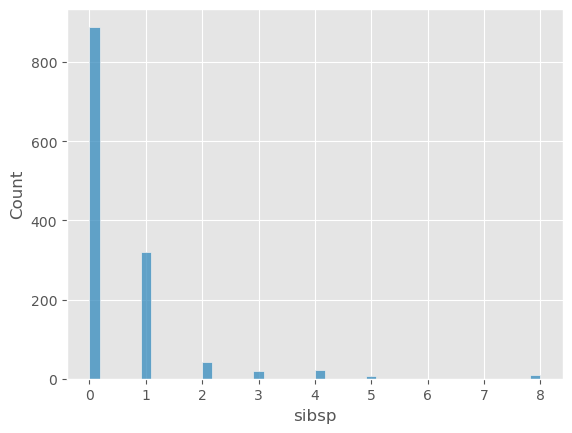

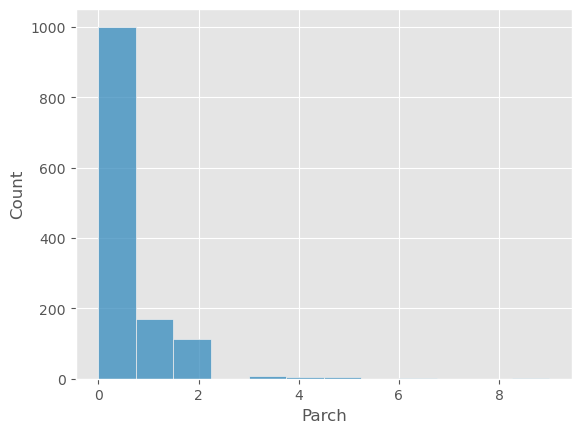

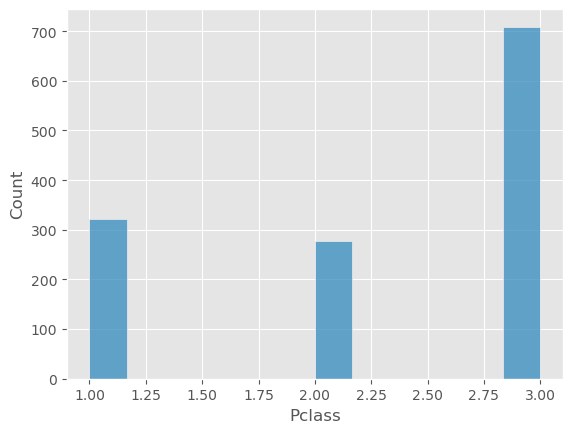

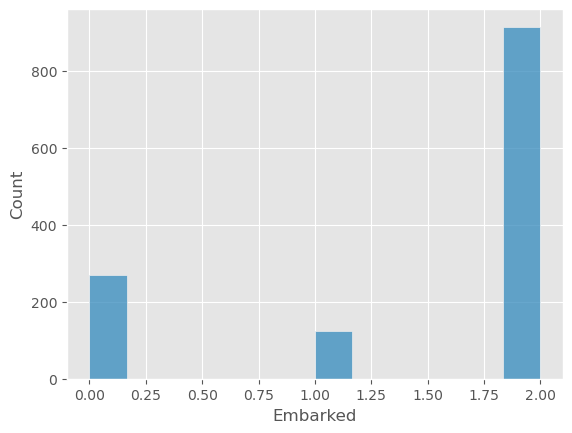

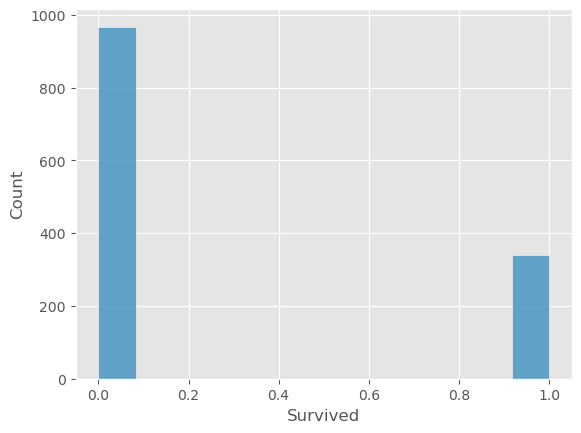

In [14]:
for i in df.select_dtypes(include = 'number').columns:
    sns.histplot(data = df, x = i)
    plt.show()

In [15]:
s = df.corr()

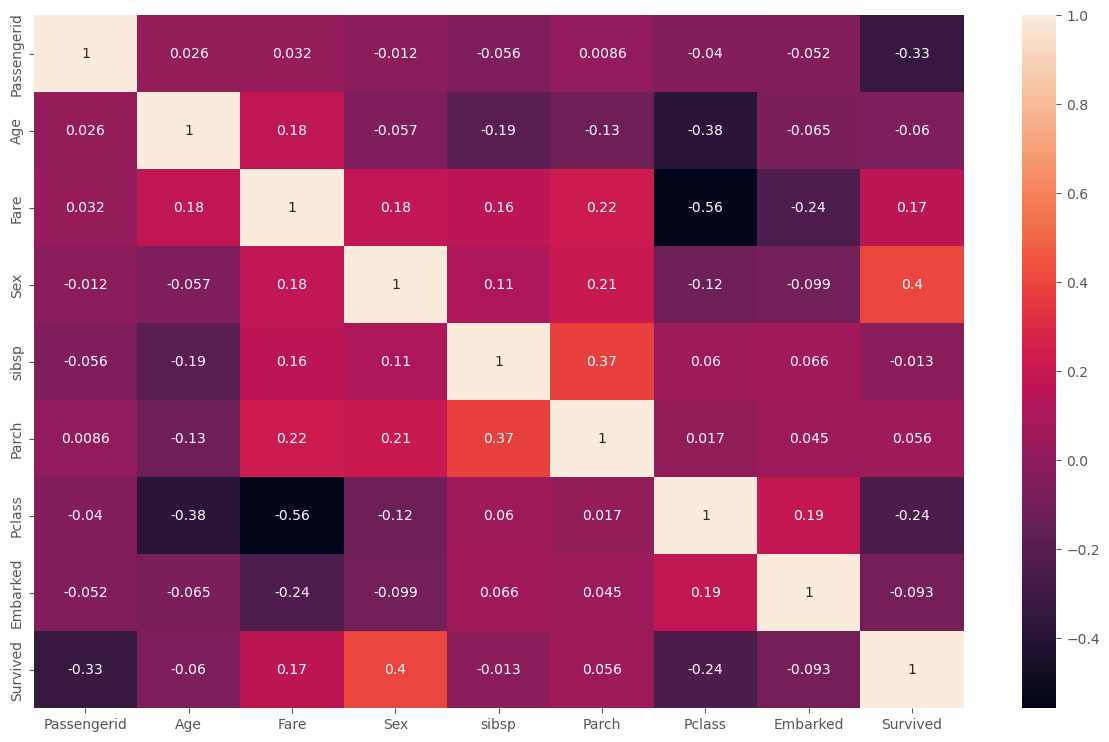

In [16]:
plt.figure(figsize = (15, 9))
sns.heatmap(s, annot = True)
plt.show()

In [17]:
df['Sex'].value_counts()

0    843
1    464
Name: Sex, dtype: int64

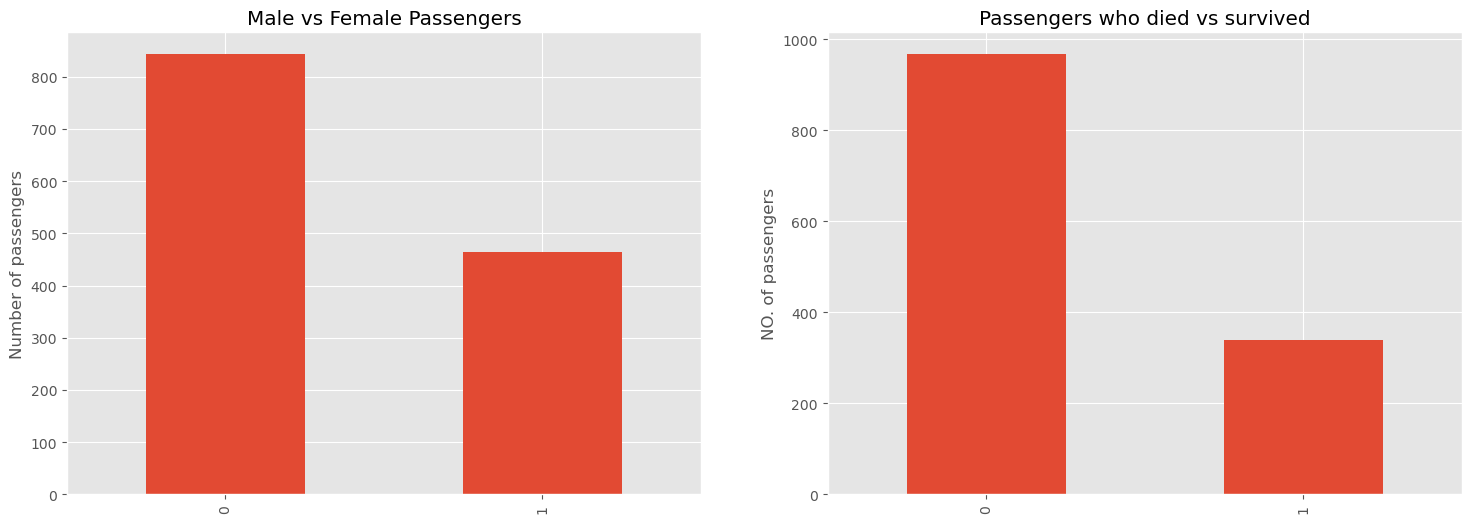

In [18]:
plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
df['Sex'].value_counts().plot(kind = 'bar')
plt.title("Male vs Female Passengers")
plt.ylabel('Number of passengers')

plt.subplot(1, 2, 2)
df['Survived'].value_counts().plot(kind = 'bar')
plt.title('Passengers who died vs survived')
plt.ylabel('NO. of passengers')


plt.show()

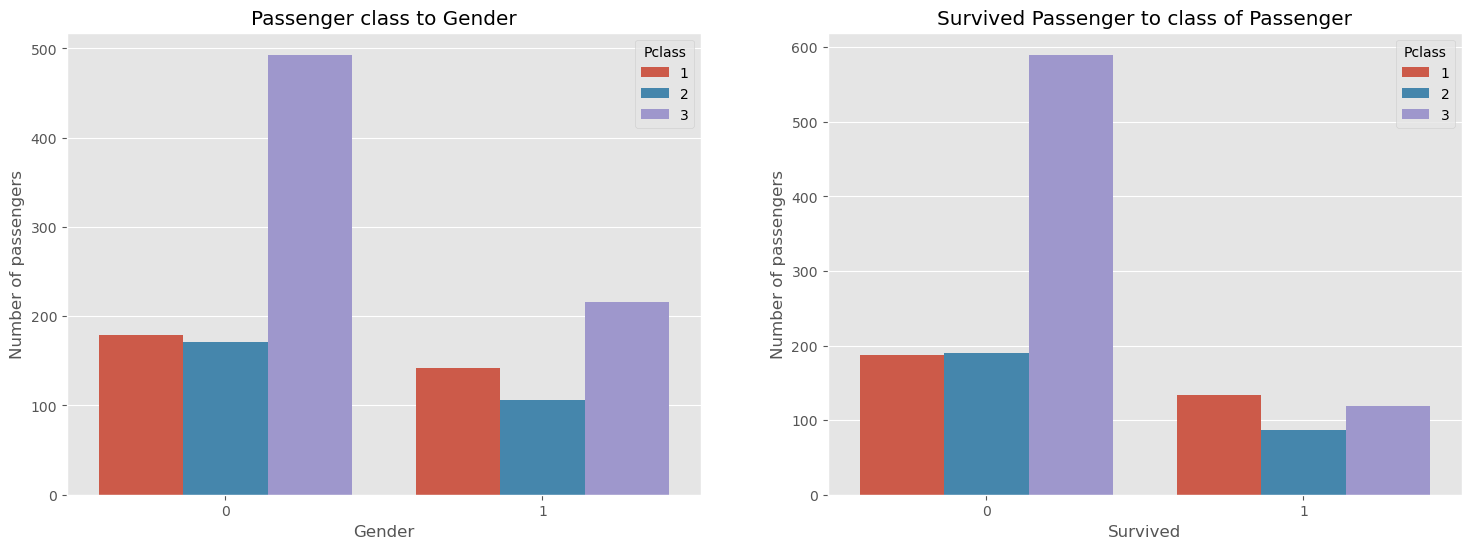

In [19]:
plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x = df['Sex'], hue = df['Pclass'])
plt.title('Passenger class to Gender')
plt.xlabel('Gender')
plt.ylabel('Number of passengers')

plt.subplot(1, 2, 2)
sns.countplot(x = df['Survived'], hue = df['Pclass'])
plt.title('Survived Passenger to class of Passenger')
plt.xlabel('Survived')
plt.ylabel('Number of passengers')
plt.show()

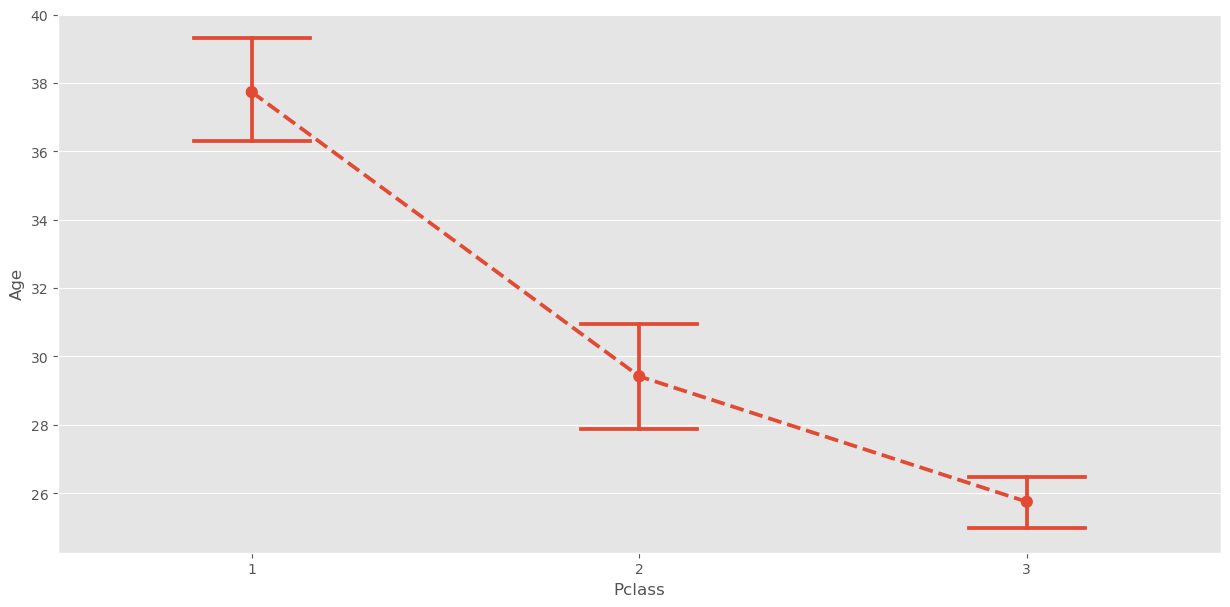

In [20]:
plt.figure(figsize = (15, 7))
sns.pointplot(x = 'Pclass', y = 'Age', data = df, linestyles = '--', capsize = .3)
plt.show()

In [21]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

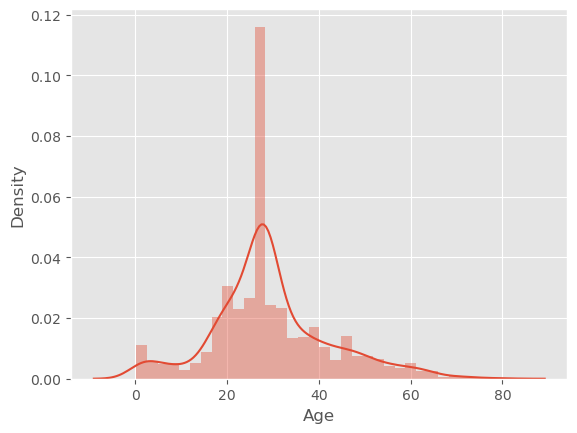

In [22]:
sns.distplot(df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

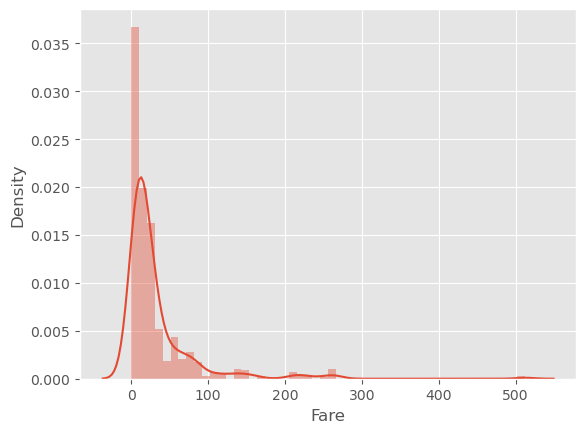

In [23]:

sns.distplot(df['Fare'])

In [24]:
#find limits
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
print('Upper limit', upper_limit)
print('lower_limit', lower_limit)

Upper limit 68.11659639345595
lower_limit -9.172954465376385


In [25]:
#find outliers
df.loc[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
95,97,71.0,34.6542,0,0,0,1,0.0,0
115,117,70.5,7.7500,0,0,0,3,1.0,0
492,494,71.0,49.5042,0,0,0,1,0.0,0
629,631,80.0,30.0000,0,0,0,1,2.0,1
671,673,70.0,10.5000,0,0,0,2,2.0,0
744,746,70.0,71.0000,0,1,1,1,2.0,0
849,852,74.0,7.7750,0,0,0,3,2.0,0
985,988,76.0,78.8500,1,1,0,1,2.0,0


In [26]:
#trimmed data
new_df = df.loc[(df['Age'] < upper_limit) & (df['Age'] > lower_limit)]
print('len of new_df', len(new_df))
print('len of new_df', len(df))
print('data trimmed is:', len(df) - len(new_df))

len of new_df 1299
len of new_df 1307
data trimmed is: 8


<AxesSubplot:xlabel='Age'>

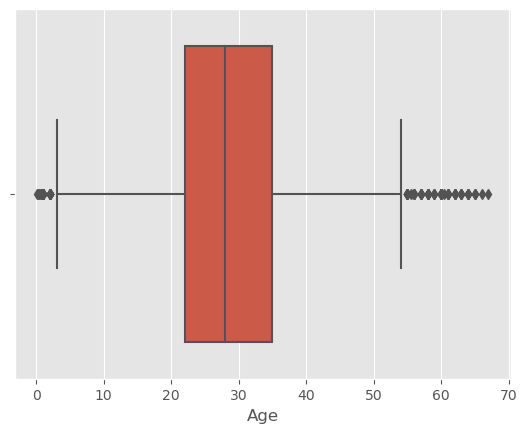

In [27]:
# cappin data - change outlier values to upper limit or lower limit
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(new_df['Age'])


In [28]:
# cappin data - change outlier values to upper limit or lower limit
new_df = df.copy() 

<AxesSubplot:xlabel='Age'>

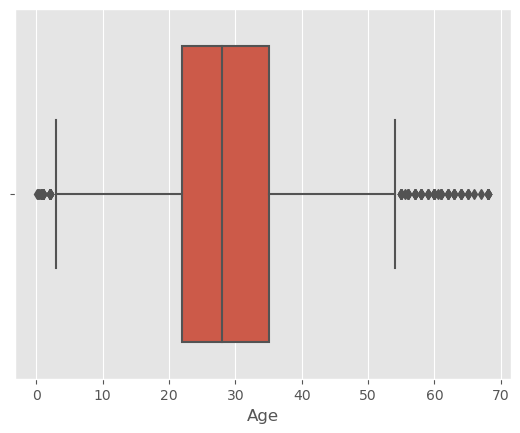

In [29]:
new_df.loc[new_df['Age'] > upper_limit, 'Age'] = upper_limit
new_df.loc[new_df['Age'] < lower_limit, 'Age'] = lower_limit
sns.boxplot(new_df['Age'])

In [30]:
len(new_df)

1307

In [31]:
#Iqr method
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

In [32]:
q1, q3, iqr

(22.0, 35.0, 13.0)

In [33]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(2.5, 54.5)

<AxesSubplot:xlabel='Age'>

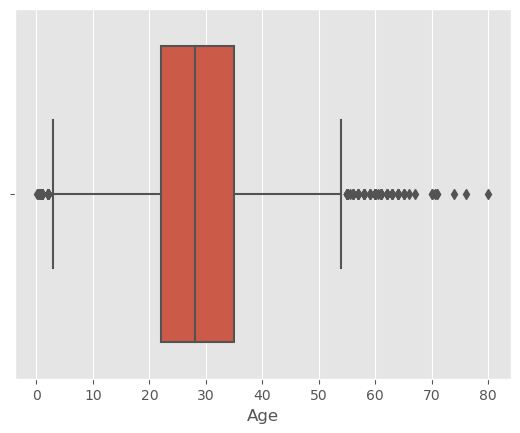

In [34]:
sns.boxplot(df['Age'])

In [35]:
#find outliers
df.loc[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
7,8,2.00,21.0750,0,3,1,3,2.0,0
11,12,58.00,26.5500,1,0,0,1,2.0,1
15,16,55.00,16.0000,1,0,0,2,2.0,1
16,17,2.00,29.1250,0,4,1,3,1.0,0
33,34,66.00,10.5000,0,0,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...
1232,1235,58.00,512.3292,1,0,1,1,0.0,0
1243,1246,0.17,20.5750,1,1,2,3,2.0,0
1245,1248,59.00,51.4792,1,2,0,1,2.0,0
1267,1270,55.00,50.0000,0,0,0,1,2.0,0


In [36]:
#trimmed data
new_df = df.loc[(df['Age'] < upper_limit) & (df['Age'] > lower_limit)]
print('len of new_df', len(new_df))
print('len of new_df', len(df))
print('data trimmed is:', len(df) - len(new_df))

len of new_df 1207
len of new_df 1307
data trimmed is: 100


<AxesSubplot:xlabel='Age'>

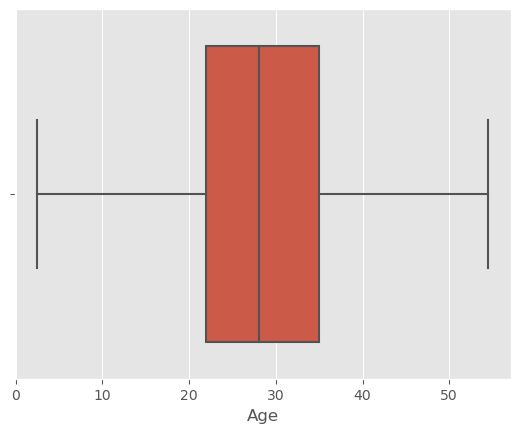

In [37]:
import warnings
#filter.warning('ignore')
new_df = df.copy() 
new_df.loc[new_df['Age'] > upper_limit, 'Age'] = upper_limit
new_df.loc[new_df['Age'] < lower_limit, 'Age'] = lower_limit
sns.boxplot(new_df['Age'])

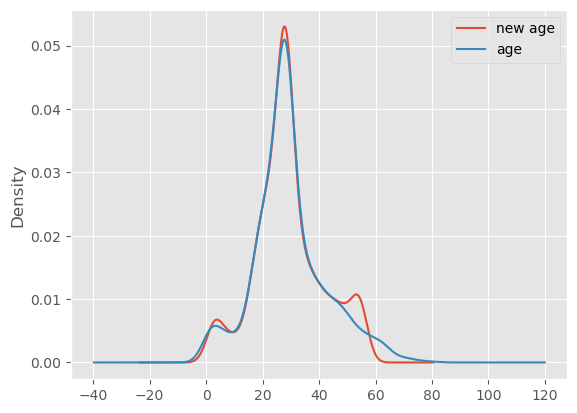

In [38]:
new_df['Age'].plot(kind = 'kde', label = 'new age')
df['Age'].plot(kind = 'kde', label = 'age')
plt.legend()
plt.show()

In [40]:
df.sample()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
228,230,28.0,25.4667,1,3,1,3,2.0,0


In [44]:
X = df.copy()
y = df['Survived']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state = 42)

In [69]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [66]:
pip install xgboost

     ------------------------------------- 124.9/124.9 MB 40.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [67]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xgb = GradientBoostingRegressor
xgb.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [71]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

TypeError: predict() missing 1 required positional argument: 'X'

In [53]:
from sklearn import metrics

In [54]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

NameError: name 'y_pred3' is not defined

In [55]:
print(score1, score2, score3, score4)

NameError: name 'score3' is not defined

In [56]:
final_data = pd.DataFrame({'Models' : ['LR', 'RF', 'GBR', 'XG'],
                          'R2_SCORE' : [score1, score2, score3, score4]})
final_data

NameError: name 'score3' is not defined

In [57]:
sns.barplot(final_data['Models'], final_data['R2_SCORE'])

NameError: name 'final_data' is not defined